In [38]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
import shapefile
import shapely as s
import shapely.geometry as g
from shapely.ops import cascaded_union
from copy import deepcopy

import cPickle as pickle

In [26]:
sf = shapefile.Reader('test.shp')

In [27]:
shps = sf.shapes()

In [28]:
vertices = [array(i.points) for i in shps]

In [10]:
vertices[0]

array([[-77.0326381,  38.9128548],
       [-77.0321431,  38.9128544],
       [-77.0321433,  38.9127313],
       [-77.0326383,  38.9127318],
       [-77.0326381,  38.9128548]])

In [69]:
x = hstack([i[:, 0] for i in vertices])
y = hstack([i[:, 1] for i in vertices])

xmin = x.min()
ymin = y.min()

xsc = abs(x - xmin).max()
ysc = abs(y - ymin).max()

In [80]:
scaled_vert = []
Dx, Dy = 246.615, 176.333 
for i in deepcopy(vertices):
    i[:, 0] -= xmin
    i[:, 0] /= xsc / Dx
    i[:, 1] -= ymin
    i[:, 1] /= ysc / Dy
    
    scaled_vert.append(i)

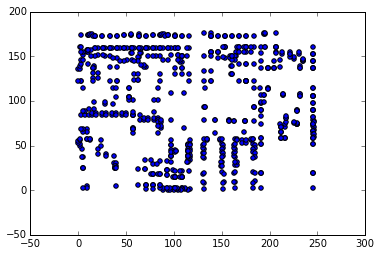

In [81]:
scatter(*vstack(scaled_vert).T)

In [82]:
polys = map(g.Polygon, scaled_vert)

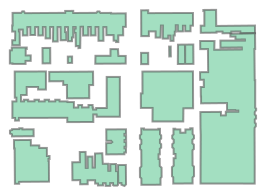

In [83]:
cascaded_union(polys)

In [85]:
with open('revised_geo.pkl', 'w') as f:
    pickle.dump(polys, f)